# Welcome to my k-Means clustering practice!

##### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
%matplotlib inline
from sklearn.cluster import KMeans

##### Generating and visualizing data points

Text(0.5, 1.0, 'Six Clusters')

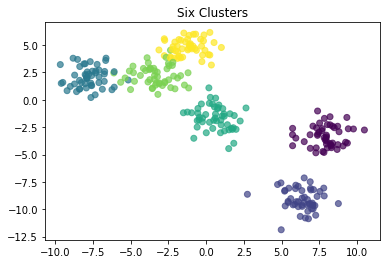

In [2]:
X_train, y_train = make_blobs(n_samples=300, centers=6, n_features=2, random_state=6, cluster_std=1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.7)
plt.title('Six Clusters')

##### Generating and visualizing test data points

Text(0.5, 1.0, 'Six Clusters With Test Points')

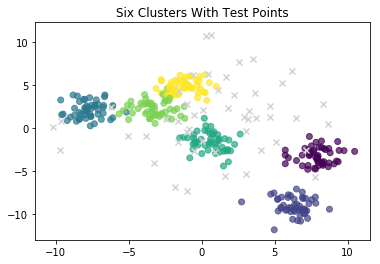

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7)

X_test, y_test = make_blobs(n_samples=50, center_box=(1, 1), 
                            n_features=2, random_state=9, cluster_std=4)

plt.scatter(X_test[:, 0], X_test[:, 1], color='LightGrey', linewidths=8, marker='x')

plt.title('Six Clusters With Test Points')

The grey 'x' will be the test data; we will try to predict which category they'd belong to.

##### Getting all the points into a dataframe (excluding the test points), and shuffling

In [4]:
df = pd.DataFrame(X_train, columns = ['X', 'Y']).sample(frac=1).reset_index(drop=True)
df.head()

,X,Y
0,-5.372228,1.995299
1,-4.156445,2.865573
2,-1.476964,6.096741
3,-2.459257,3.106323
4,0.555301,-0.656462


In [5]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_train)
kmeans.labels_[:50]

array([5, 4, 1, 3, 5, 0, 3, 5, 4, 2, 4, 3, 2, 3, 2, 3, 5, 2, 4, 0, 1, 0,
       3, 0, 3, 1, 4, 3, 5, 4, 3, 2, 4, 2, 5, 2, 5, 0, 3, 4, 4, 0, 5, 4,
       2, 0, 3, 4, 0, 5])

In [6]:
df['Label'] = kmeans.labels_ 
df.head()

,X,Y,Label
0,-5.372228,1.995299,5
1,-4.156445,2.865573,4
2,-1.476964,6.096741,1
3,-2.459257,3.106323,3
4,0.555301,-0.656462,5


##### The test points

In [7]:
df_test = pd.DataFrame(X_test, columns = ['X', 'Y'])
df_test.head()

,X,Y
0,0.037278,-1.591790
1,-2.420651,1.000886
2,0.909081,-2.839988
3,7.170919,-2.602885
4,-0.992899,-7.367107


##### Plotting the graph, with the (transparent) test points 

Text(0.5, 1.0, 'Six Clusters With Test Points')

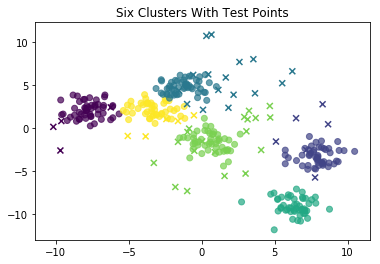

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_, alpha=0.7)

plt.scatter(X_test[:, 0], X_test[:, 1], c=kmeans.predict(df_test), 
            linewidths=8, marker='x')

plt.title('Six Clusters With Test Points')

Success! The k-Means algorithm fit the test data in relevant groups

##### Showing the cluster centers 

In [9]:
kmeans.cluster_centers_

array([[-7.72742759,  2.05171011],
       [ 7.92562732, -3.30419635],
       [-1.25545815,  4.74606183],
       [ 6.36115682, -9.11739875],
       [ 0.59275672, -1.66145485],
       [-3.30685143,  2.093986  ]])

Text(0.5, 1.0, 'Five Clusters With Test Points and Cluster Centers')

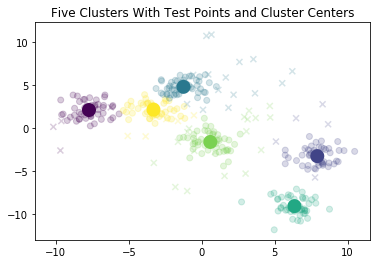

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_, alpha=0.2)

plt.scatter(X_test[:, 0], X_test[:, 1], c=kmeans.predict(df_test), 
            linewidths=8, marker='x', alpha=0.2)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=kmeans.predict(kmeans.cluster_centers_), 
            linewidths=8)

plt.title('Five Clusters With Test Points and Cluster Centers')

## Now let's do it in 3D

##### Generating and visualizing data points

C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 432x288 with 0 Axes>

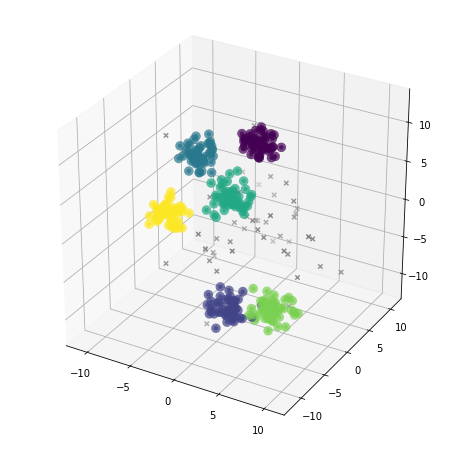

In [11]:
fig = plt.figure()
fig = plt.figure(figsize=(8, 8))

X_train, y_train = make_blobs(n_samples=300, centers=6, n_features=3, random_state=42, cluster_std=1)

X_test, y_test = make_blobs(n_samples=50, center_box=(-1, 1), 
                            n_features=3, random_state=10, cluster_std=4)

plt.title('Six Clusters With Test Points')

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, linewidths=5, alpha=.7)
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], linewidths=15, marker='x', c='Grey')

plt.show()

##### Getting all the points into a dataframe (excluding the test points)

In [12]:
df_train = pd.DataFrame(X_train, columns = ['X', 'Y', 'Z'])
df_train.head()

,X,Y,Z
0,5.241341,-6.531034,-7.474077
1,-10.245792,6.605079,1.808853
2,-1.533652,8.535112,4.454220
3,-0.318742,8.023750,4.073581
4,4.916843,-9.087393,8.420642


In [13]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

##### The test points

In [14]:
df_test = pd.DataFrame(X_test, columns = ['X', 'Y', 'Z'])
df_test.head()

,X,Y,Z
0,9.109863,-2.940969,2.369846
1,3.728335,2.670088,4.557015
2,-1.994375,6.636553,8.253388
3,-4.340293,0.627327,-5.744628
4,-1.255084,1.122745,-1.375285


##### Plotting the graph, with the (transparent) test points 

C:\Users\Nicolas\Miniconda3\envs\tfenv\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 432x288 with 0 Axes>

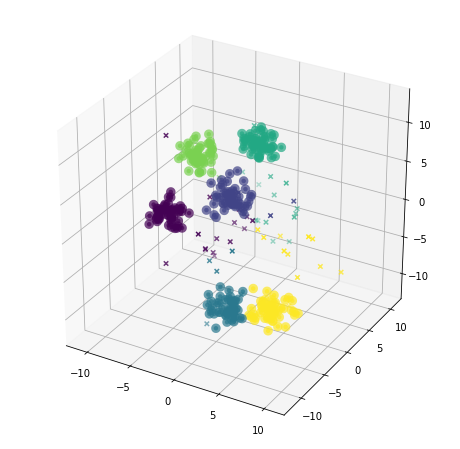

In [15]:
fig = plt.figure()
fig = plt.figure(figsize=(8, 8))

plt.title('Six Clusters With Test Points')

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=kmeans.labels_, linewidths=5, alpha=.7)
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], marker='x', c=kmeans.predict(X_test))

plt.show()

Success! The k-Means algorithm fit the test data in relevant groups in 3d too

##### Showing the cluster centers 

In [16]:
clusters = kmeans.cluster_centers_
clusters

array([[-6.09781513, -3.83369764,  0.84755775],
       [ 4.11766288, -9.46203788,  9.10372435],
       [ 2.1749487 , -6.71669127, -7.14962735],
       [-2.62407721,  8.96344413,  4.5546782 ],
       [-8.80065999,  7.2922448 ,  2.06268993],
       [ 6.55913856, -5.71362199, -6.49952433]])

<Figure size 432x288 with 0 Axes>

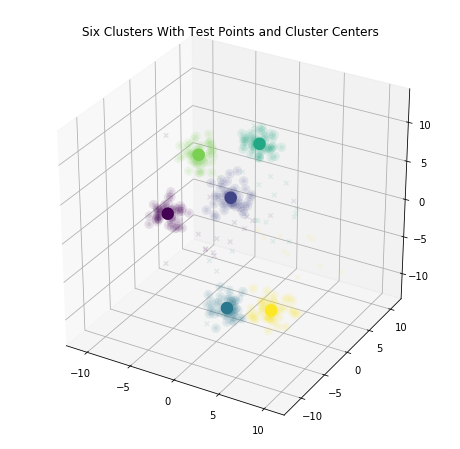

In [20]:
fig = plt.figure()
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=kmeans.labels_, linewidths=5, alpha=.1)
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], marker='x', c=kmeans.predict(X_test), alpha=.1)

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 2], c=kmeans.predict(kmeans.cluster_centers_), linewidths=8, alpha=1)

plt.title('Six Clusters With Test Points and Cluster Centers')

plt.show()